In [ ]:
'''
#To generate a detailed pandas report 

from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

In [25]:
#%matplotlib notebook
df = pd.read_excel('Investment_Data_Train.xlsx')
df.sample(5)

# Create a boolean mask indicating the rows to be dropped
mask = df['State'].isin(['Federal Offshore - Gulf of Mexico', 'Federal Offshore - Pacific'])

# Drop the rows where the mask is True
df = df[~mask]
print(df.shape)
#print(df.describe())
print(df.isna().sum())

(7540, 9)
Unnamed: 0                    0
MSN                           0
StateCode                     0
Year                          0
Amount                        0
State                         0
CO2 Emissions (Mmt)         145
TotalNumberofInvestments    290
TotalAmountofAssistance     290
dtype: int64


In [ ]:
#group by state and replace the missing value with its median

#df["CO2 Emissions (Mmt)"].fillna(df.groupby("State")["CO2 Emissions (Mmt)"].transform("median"), inplace=True)
#df["TotalNumberofInvestments"].fillna(df.groupby("State")["TotalNumberofInvestments"].transform("median"), inplace=True)
#df["TotalAmountofAssistance"].fillna(df.groupby("State")["TotalAmountofAssistance"].transform("median"), inplace=True)

In [ ]:
#drop the index column and statecode 

# Calculate the 50th percentile value
#fill_value = df.dropna().median().mean()
# Replace missing values with the 50th percentile value
#df = df.fillna(fill_value)

#drop all the rows with Null values


In [26]:
#Ordinal encoding

import category_encoders as ce

# Create an ordinal encoder object
encoder = ce.OrdinalEncoder()

# Fit and transform the data
df_encoded = encoder.fit_transform(df)
df_encoded = encoder.fit_transform(df)
df_encoded.shape
df = df_encoded
df.shape

(7540, 9)

In [ ]:
''''
#one Hot Encoding 
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_columns = ['MSN']
categorical_data = df[categorical_columns]

# One-hot encode the categorical data
encoder = OneHotEncoder()
encoded_categorical_data = encoder.fit_transform(categorical_data)

# Concatenate the encoded data with the rest of the da = pd.concat([df.drop(categorical_columns, axis=1), pd.DataFrame(encoded_categorical_data.toarray())], axis=1)
''''''


In [27]:
df = df.drop(['Unnamed: 0', 'State','Amount'], axis = 1)
df = df.dropna(axis = 0)
df = df.astype('float64')
df.isnull().sum()

MSN                         0
StateCode                   0
Year                        0
CO2 Emissions (Mmt)         0
TotalNumberofInvestments    0
TotalAmountofAssistance     0
dtype: int64

In [28]:
#loading test data and necessary preprocessing
test = pd.read_excel('Investment_Data_2020.xlsx')
test = test.dropna(axis=0)
test = test.drop(['Unnamed: 0', 'State','Amount'], axis=1)
test_encoded = encoder.fit_transform(test)
print(test_encoded.shape)
test = test_encoded
test = test.astype('float64')
test.isnull().sum()

(1450, 6)


MSN                         0
StateCode                   0
Year                        0
CO2 Emissions (Mmt)         0
TotalNumberofInvestments    0
TotalAmountofAssistance     0
dtype: int64

In [10]:
def boxcox_multivariate(data):
    transformed_data = np.zeros_like(data)
    for i in range(data.shape[1]):
        transformed_data[:,i], _ = stats.boxcox(data[:,i]+1)
    return transformed_data


In [20]:
#df = boxcox_multivariate(df.values)
#test = boxcox_multivariate(test.values)

,MSN,StateCode,Year,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance
0,1.0,1.0,2020.0,35.967527,37.0,9567164.0
1,2.0,1.0,2020.0,35.967527,37.0,9567164.0
2,3.0,1.0,2020.0,35.967527,37.0,9567164.0
3,4.0,1.0,2020.0,35.967527,37.0,9567164.0
4,5.0,1.0,2020.0,35.967527,37.0,9567164.0
...,...,...,...,...,...,...
1503,25.0,50.0,2020.0,55.621183,11.0,229763.0
1504,26.0,50.0,2020.0,55.621183,11.0,229763.0
1505,27.0,50.0,2020.0,55.621183,11.0,229763.0
1506,28.0,50.0,2020.0,55.621183,11.0,229763.0


In [29]:
# transform a time series dataset into a supervised learning dataset
# Define the number of lags to use as features
n_lags = 1

# Create lagged variables
for i in range(1, n_lags+1):
    df[f"lag_{i}"] = df["TotalAmountofAssistance"].shift(i)

# Remove the first rows with NaN values, as they are created by the shift operation
df.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = df.drop("TotalAmountofAssistance", axis=1)
y = df["TotalAmountofAssistance"]

#same operations for test data
for i in range(1, n_lags+1):
    test[f"lag_{i}"] = test["TotalAmountofAssistance"].shift(i)
test.dropna(inplace=True)
Xtest = test.drop("TotalAmountofAssistance", axis=1)
ytest = test["TotalAmountofAssistance"]

In [36]:
# List of algorithms to try
algorithms = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]

# Evaluate each algorithm
for algo in algorithms:
    algo.fit(X, y)
    ypred = algo.predict(Xtest)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    r2 = r2_score(ytest, ypred)
    print(f"{algo.__class__.__name__}: RMSE={rmse:.2f} R^2={r2:.2f}")


LinearRegression: RMSE=9476232.75 R^2=0.92
KNeighborsRegressor: RMSE=10678744.04 R^2=0.90
DecisionTreeRegressor: RMSE=10495916.63 R^2=0.90
RandomForestRegressor: RMSE=9956659.40 R^2=0.91


In [38]:
#initial try at RFR 
model = RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=30)
model.fit(X, y)
 # make a one-step prediction
yhat = model.predict(Xtest)
print(model.score(X,y))
print(model.score(Xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,yhat)))

0.9728925208155126
0.9298196959190789
8973023.09354836


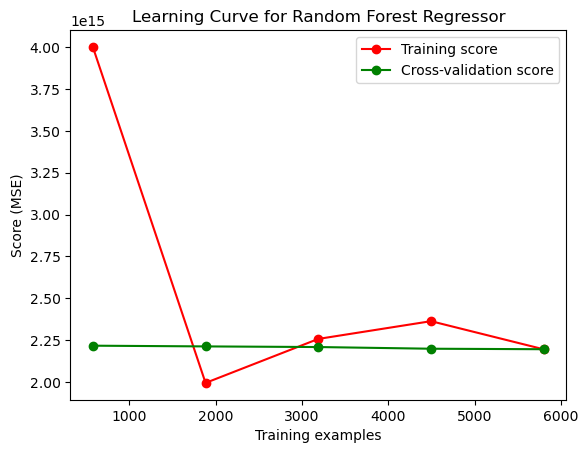

In [53]:
from sklearn.model_selection import learning_curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, 
                                                        cv=5, 
                                                        scoring='neg_mean_squared_error')

# Plot the learning curve
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score (MSE)')
plt.title('Learning Curve for Random Forest Regressor')
plt.show()

In [32]:
# Define the parameter range for hyperparameter tuning
param_grid = {'n_estimators': np.arange(10,1000,10),
              'max_depth': [5, 10, 15, 20, 30, None],
              'min_samples_split': np.arange(2, 20, 2),
              'min_samples_leaf': np.arange(1, 10, 1),
              'max_features': ['auto', 'sqrt', 'log2', None]}

# Initialize the regressor
rf = RandomForestRegressor()

# Use the RandomizedSearchCV method to optimize the hyperparameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the randomized search to the training data
rf_random.fit(X, y)

# Get the best hyperparameters
best_params = rf_random.best_params_

# Train the optimized model on the full training data
best_rf = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 max_features=best_params['max_features'])
best_rf.fit(X, y)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=30)

In [46]:
#SVM with RBF 

# Train the model using SVR with RBF kernel
model = SVR(kernel='rbf', C=1000, gamma= 'scale')
model.fit(X, y)

# Predict on the training data
y_pred = model.predict(X)

# Calculate R^2 score
r2 = r2_score(y, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print the results
print("R^2 score: {:.2f}".format(r2))
print("RMSE: {:.2f}".format(rmse))




R^2 score: -0.09
RMSE: 46790831.42


In [45]:
#to find the best parameters for SVR 

# Define the hyperparameter grid to search
param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']}

# Create an instance of SVR with RBF kernel
svr = SVR(kernel='rbf')

# Create a grid search object with the hyperparameters
grid = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the data
grid.fit(X, y)

# Get the best parameters and best estimator
best_params = grid.best_params_
best_estimator = grid.best_estimator_

# Print the results
print("Best parameters:", best_params)
print("Best estimator:", best_estimator)

Best parameters: {'C': 1000, 'gamma': 'scale'}
Best estimator: SVR(C=1000)


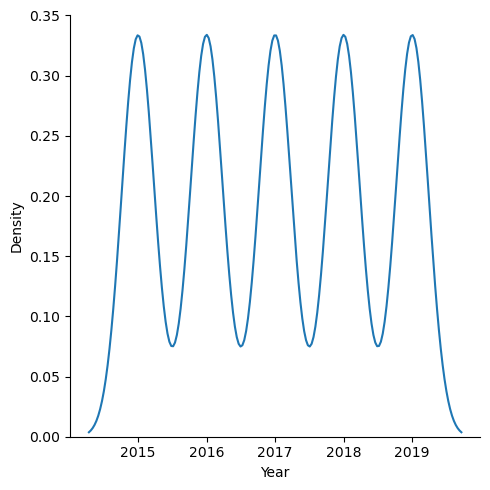

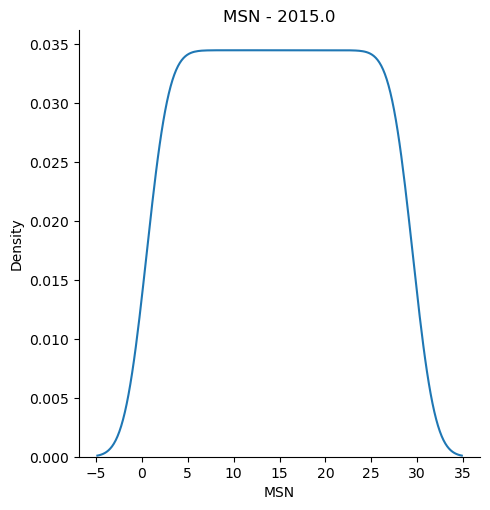

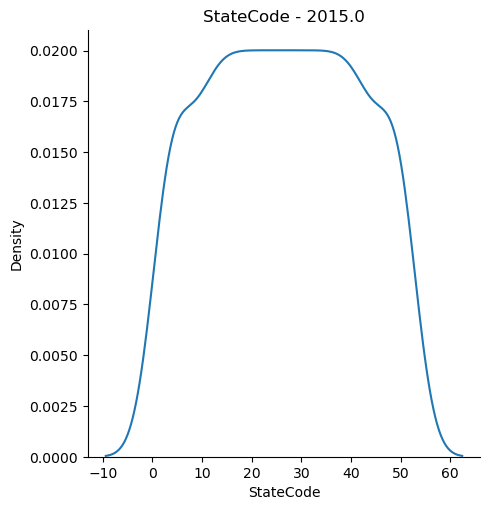

C:\Users\saniy\AppData\Local\Temp\ipykernel_16968\1557025274.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=group, x=col, kind="kde")


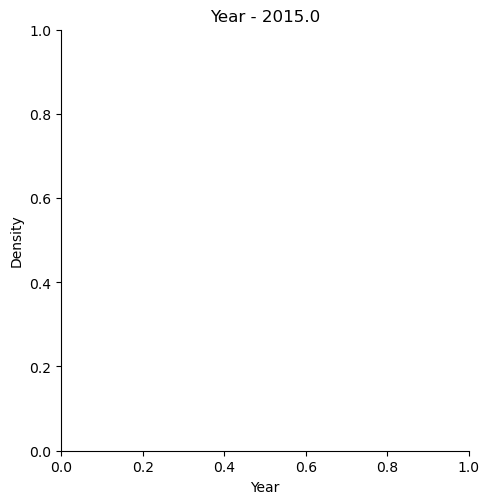

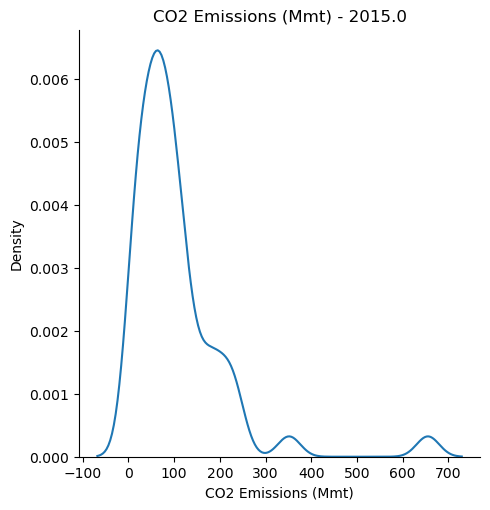

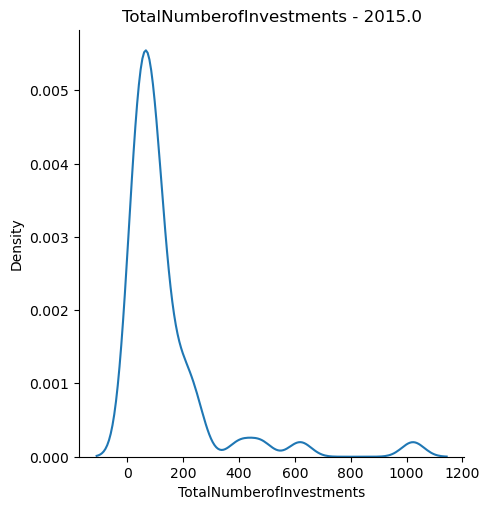

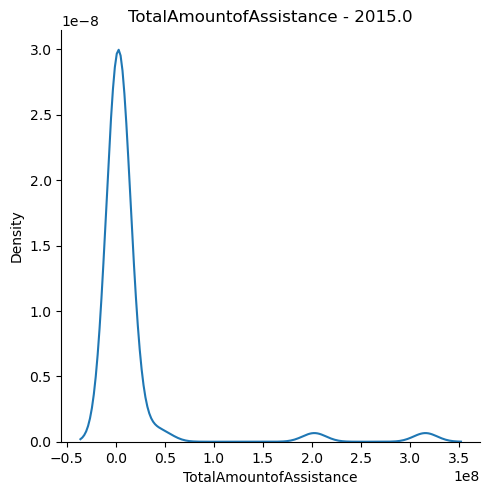

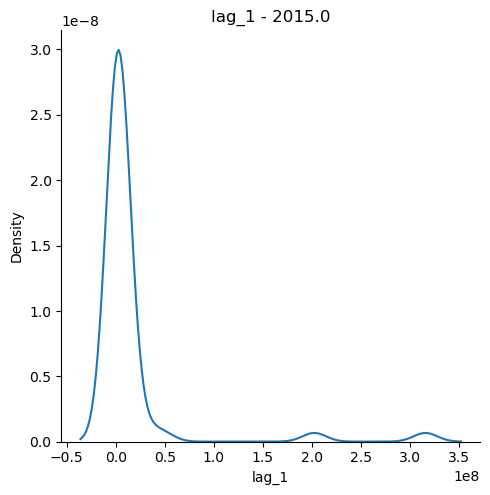

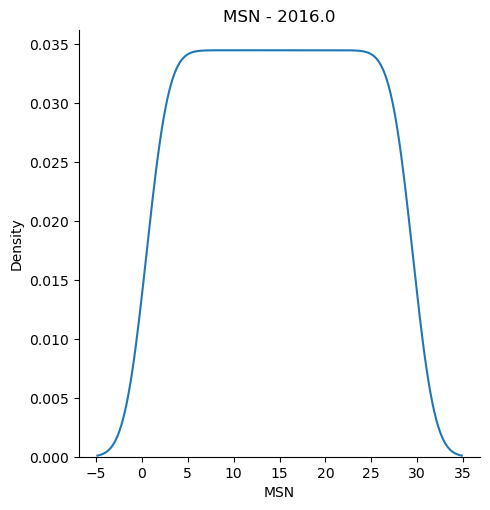

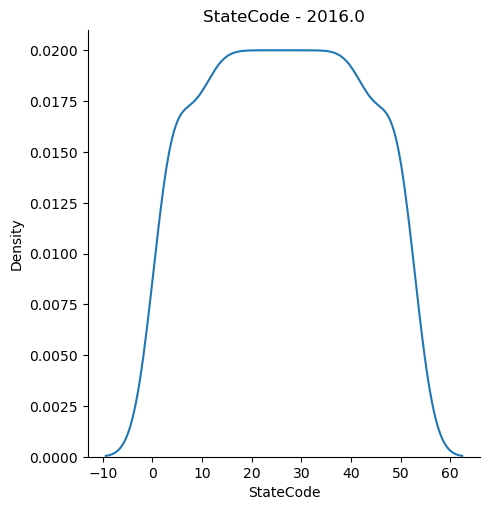

C:\Users\saniy\AppData\Local\Temp\ipykernel_16968\1557025274.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=group, x=col, kind="kde")


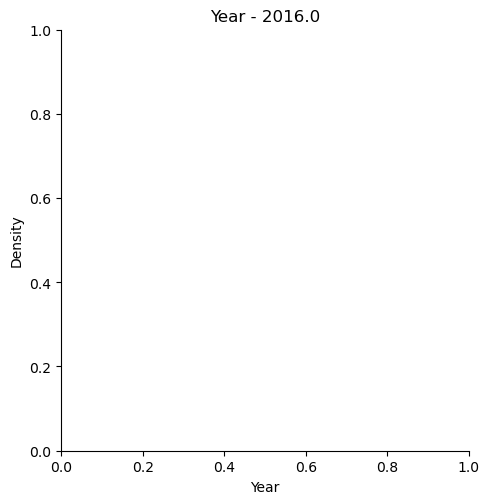

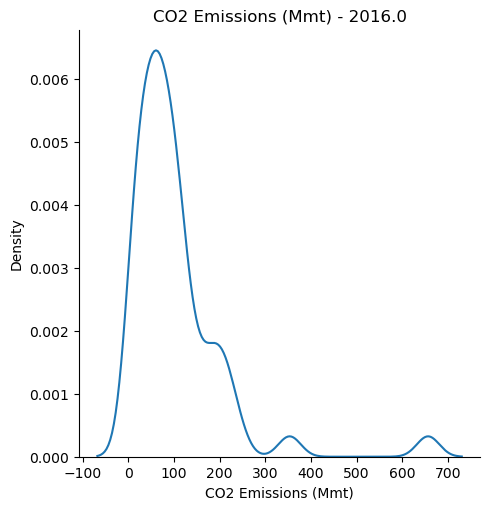

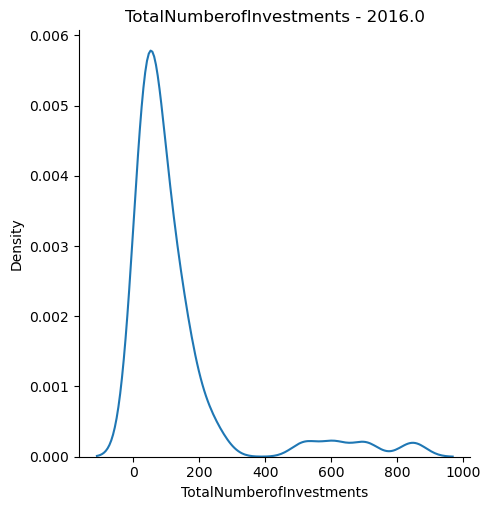

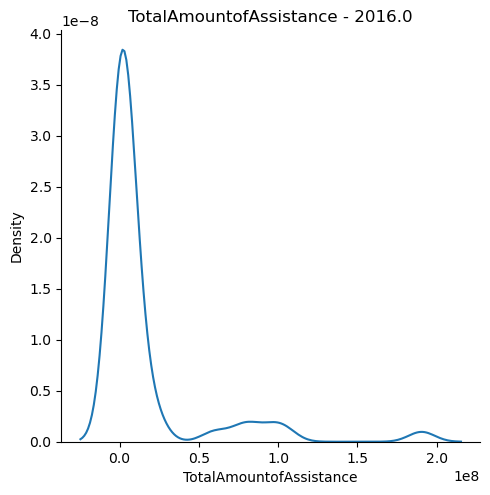

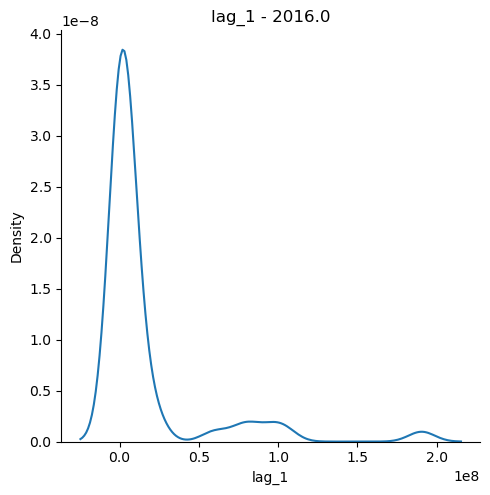

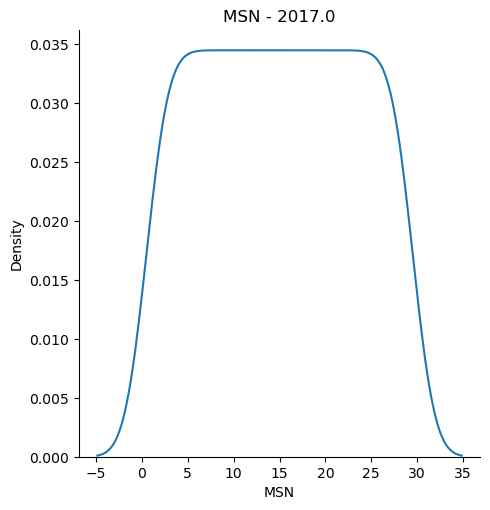

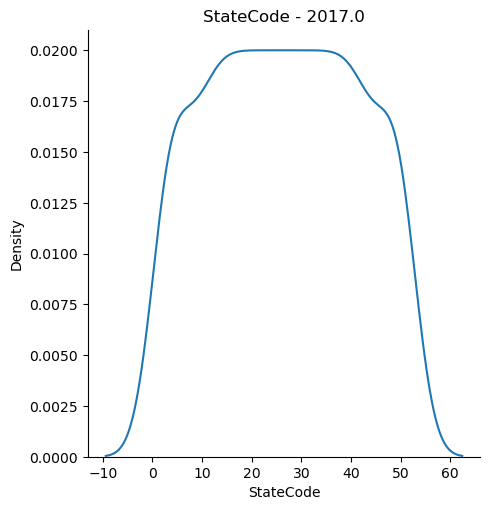

C:\Users\saniy\AppData\Local\Temp\ipykernel_16968\1557025274.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=group, x=col, kind="kde")


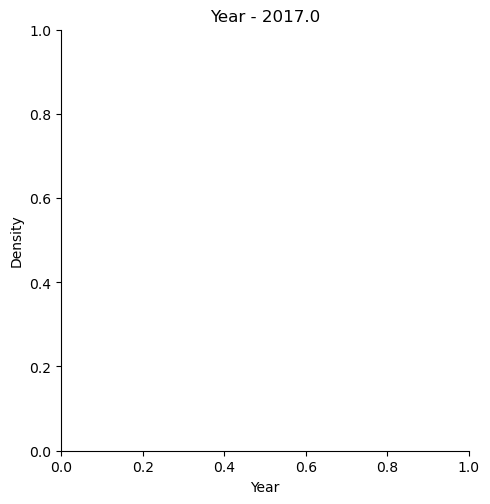

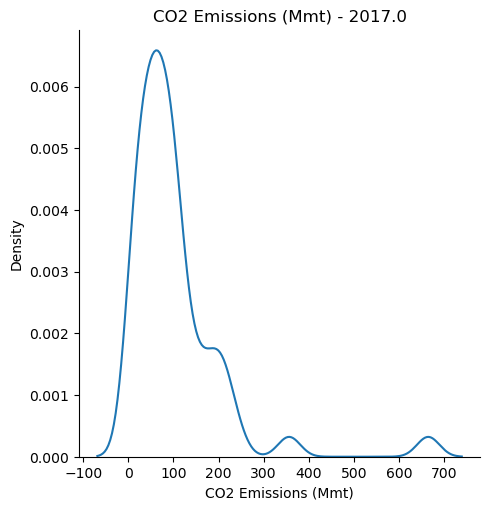

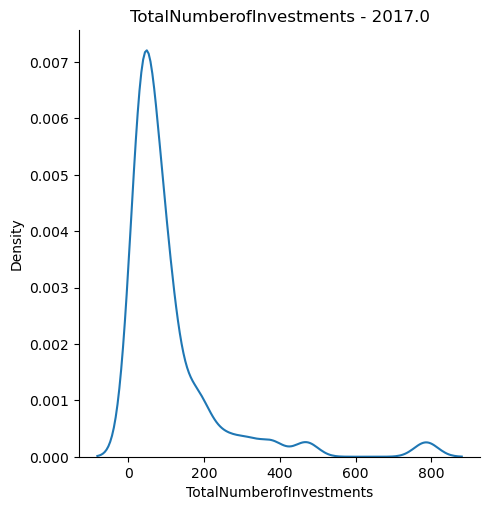

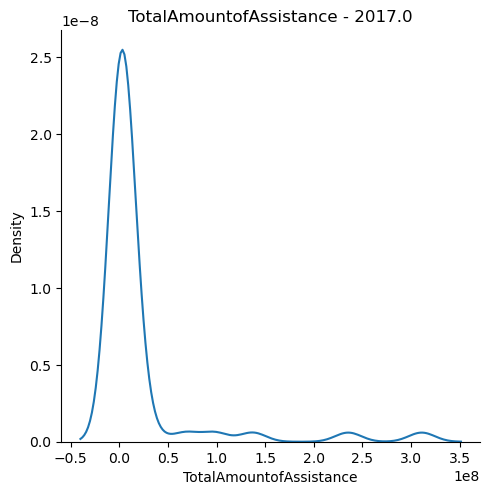

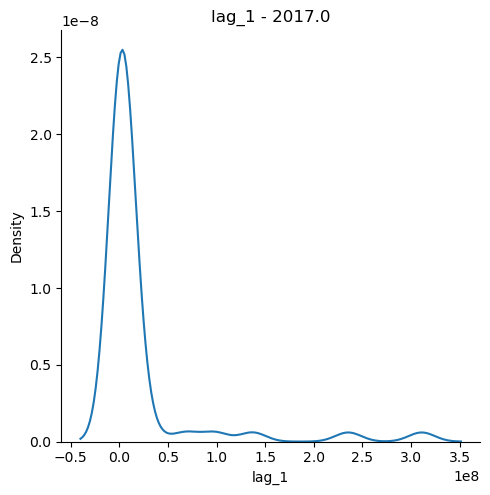

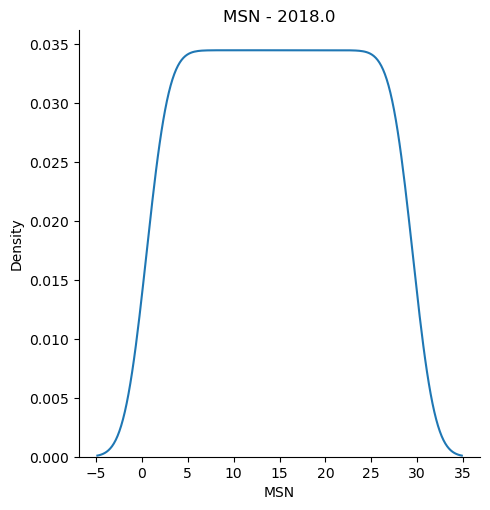

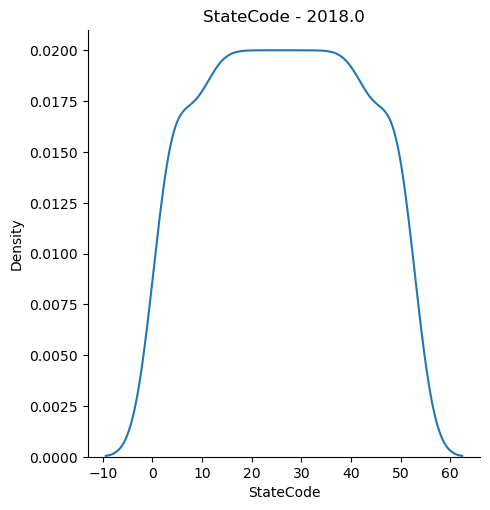

C:\Users\saniy\AppData\Local\Temp\ipykernel_16968\1557025274.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=group, x=col, kind="kde")


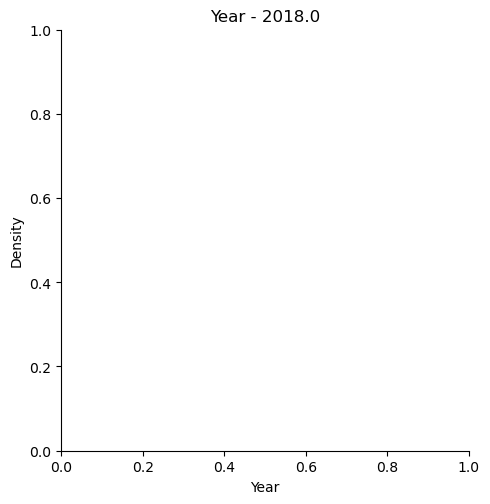

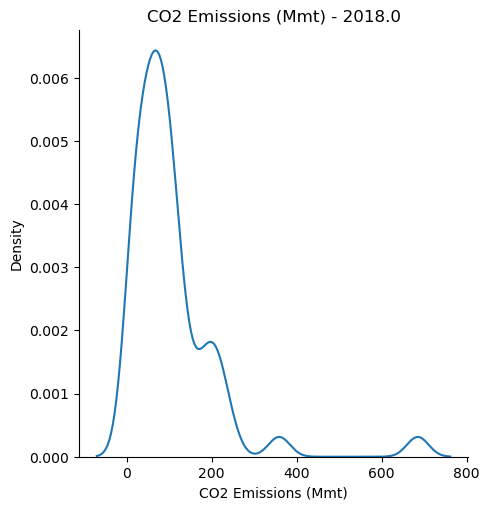

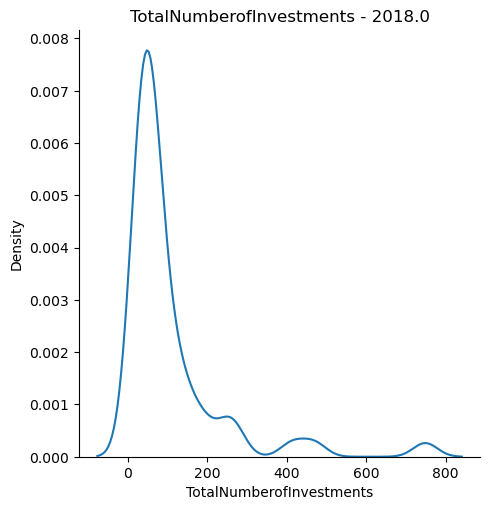

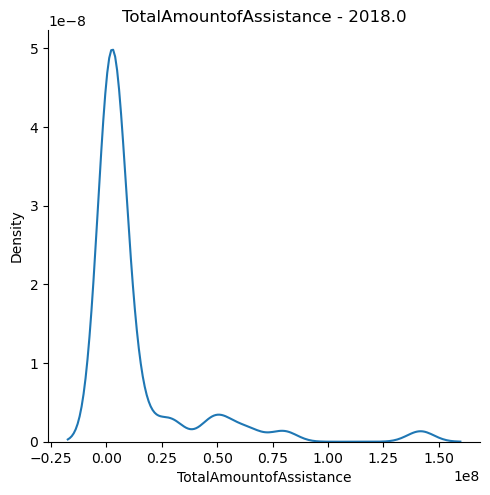

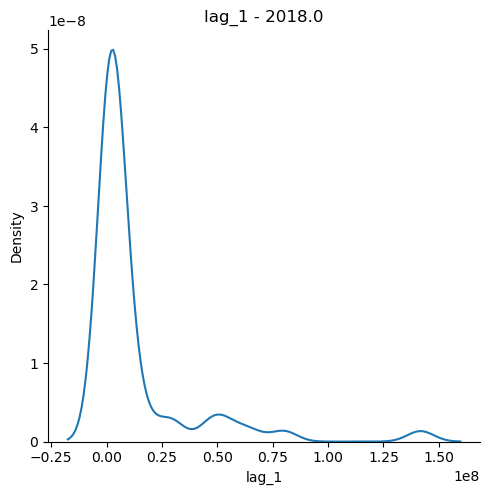

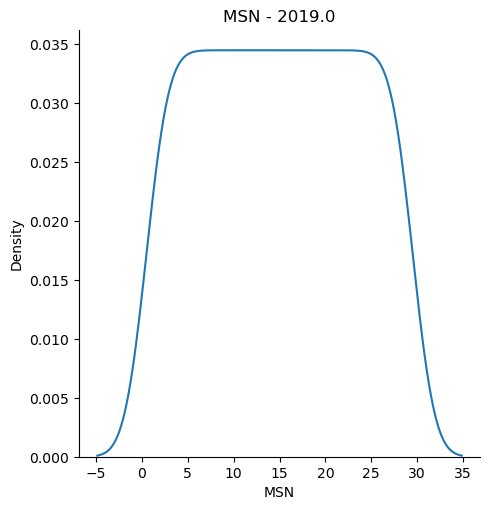

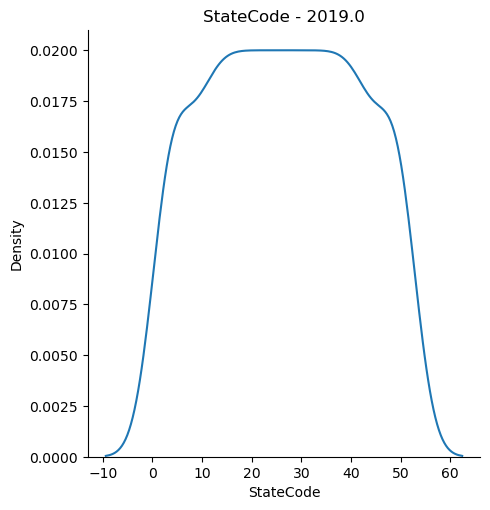

C:\Users\saniy\AppData\Local\Temp\ipykernel_16968\1557025274.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=group, x=col, kind="kde")


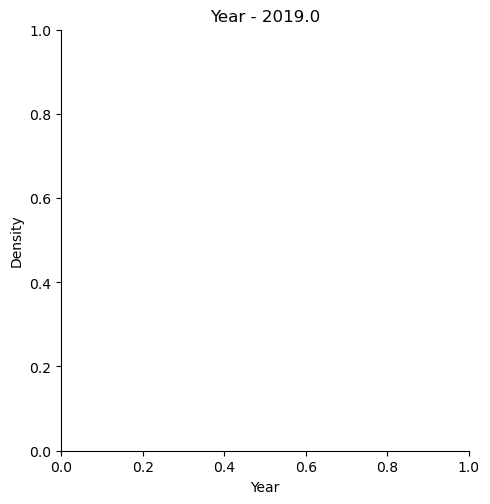

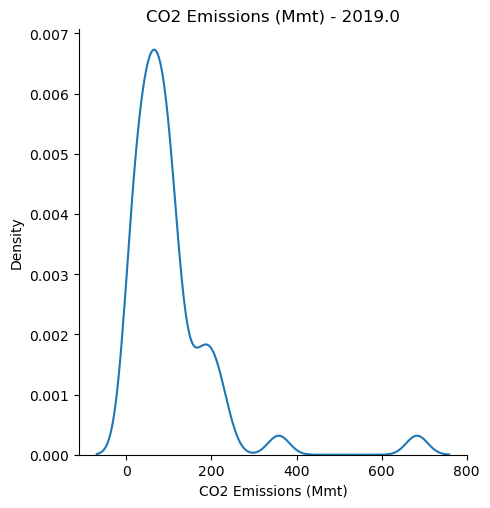

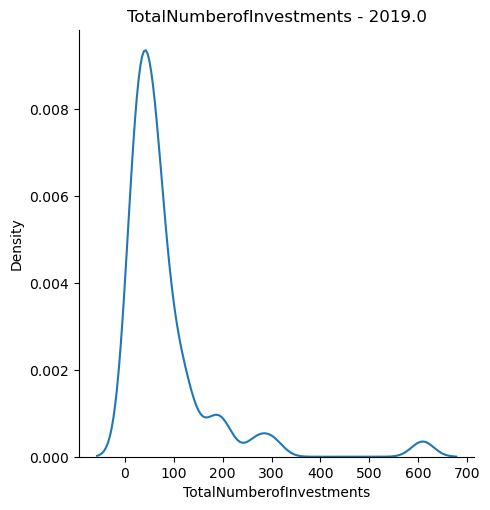

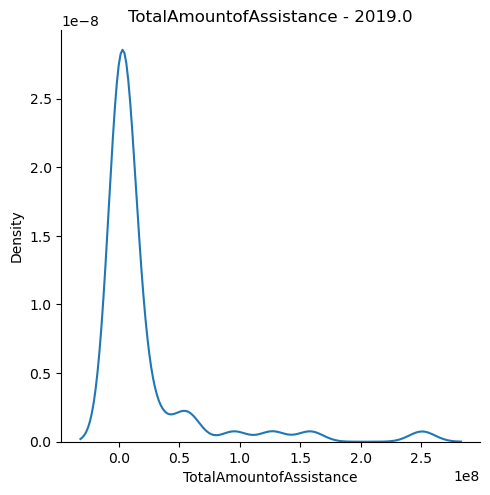

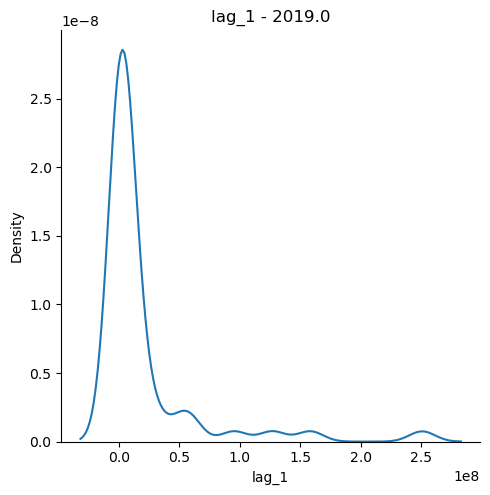

In [47]:
sns.displot(data=df, x=df['Year'], kind="kde")

grouped = df.groupby('Year')
for name, group in grouped:
    for col in group.columns:
        sns.displot(data=group, x=col, kind="kde")
        plt.title(f"{col} - {name}")
        plt.show()

# Count the number of data points for each year
year_counts = df.groupby("Year").size()

# Print the result
#print(year_counts)

In [ ]:
# Group the data by year and count the number of investments
yearly_investments = df.groupby("Year").count()

# Plot the number of investments per year as a pie chart
plt.pie(yearly_investments["TotalAmountofAssistance"], labels=yearly_investments.index)

# Show the plot



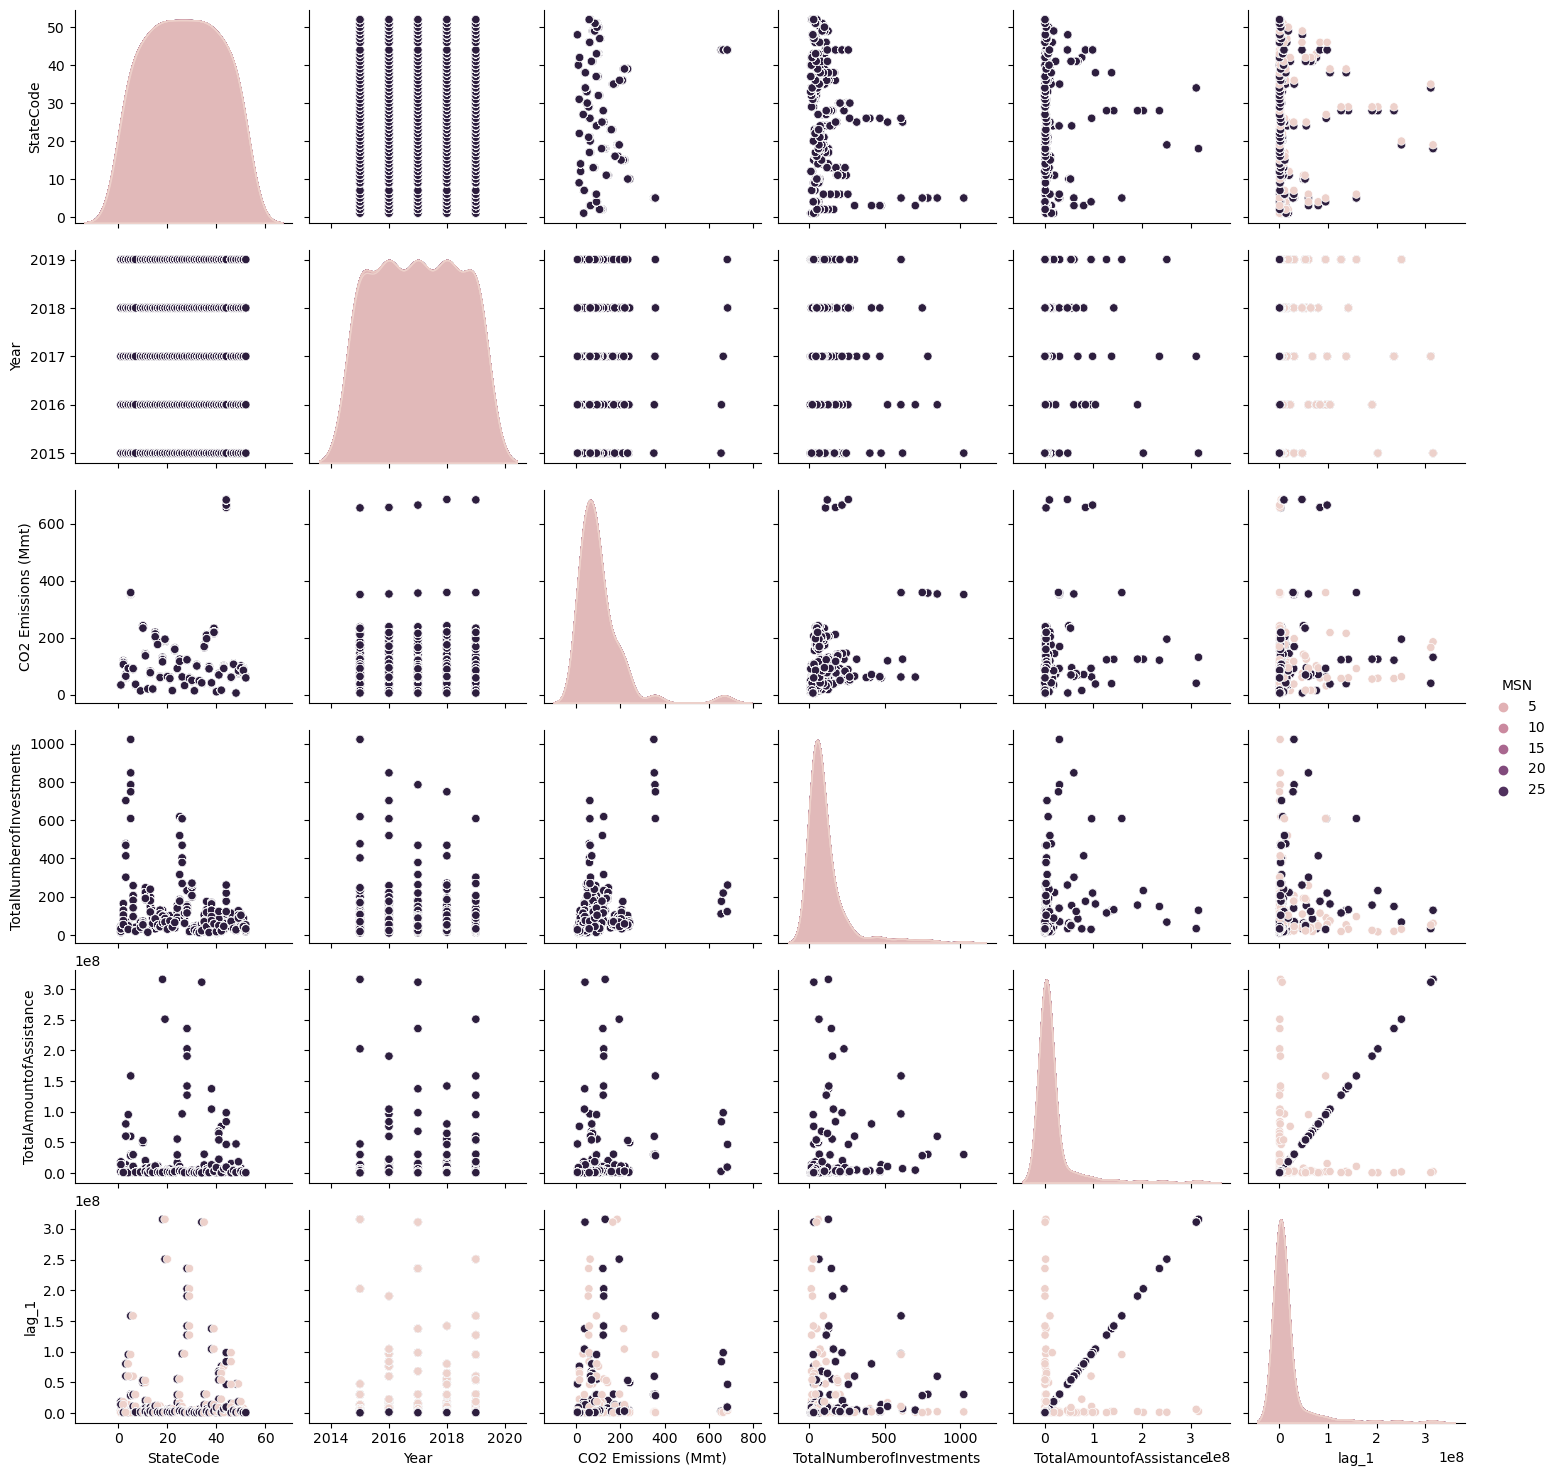

In [51]:
import seaborn as sns
sns.pairplot(df, hue='MSN')

<AxesSubplot: >

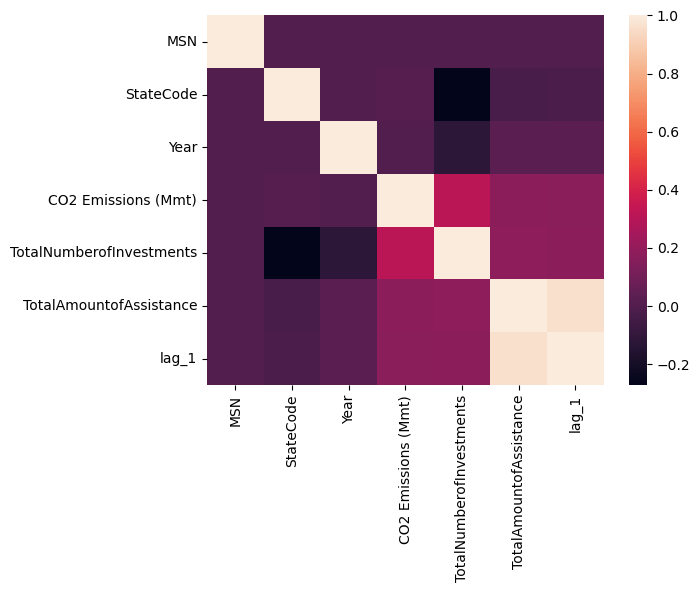

In [48]:
sns.heatmap(df.corr())

In [ ]:
'''
#scaling if needed
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
X = scaler.fit_transform(X)
#Dimensionality Reduction incase of One-hot encoding

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
X_train = pca.transform(X_train_s)
X_test = pca.transform(X_test_s)
''''''

## without converting the time series to supervised learning 
LinearRegression: MSE=1068415049973072.88 R^2=0.07
KNeighborsRegressor: MSE=1584828133147316.75 R^2=-0.38
DecisionTreeRegressor: MSE=1518348156947463.50 R^2=-0.32
RandomForestRegressor: MSE=1122303511937338.25 R^2=0.02

## after converting 
LinearRegression: MSE=89855184255781.80 R^2=0.92
KNeighborsRegressor: MSE=113022560180303.61 R^2=0.90
DecisionTreeRegressor: MSE=100908943629214.72 R^2=0.91
RandomForestRegressor: MSE=151594381349141.72 R^2=0.87

In [ ]:
#walk forward validation

In [ ]:
#simple nn AutoEncoder

from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import LeakyReLU
from keras import backend as K
from sklearn.metrics import r2_score
import tensorflow as tf


def rmse(y_true, y_pred):
    return tf.math.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


def leaky_relu(x, alpha=0.2):
    return tf.maximum(x, x * alpha)

# create the autoencoder model
input_layer = Input(shape=(X.shape[1],))
encoded1 = Dense(8, activation=leaky_relu)(input_layer)
encoded2 = Dense(16, activation=leaky_relu)(encoded1)
encoded3 = Dense(32, activation=leaky_relu)(encoded2)
decoded = Dense(X.shape[1], activation=leaky_relu)(encoded3)
autoencoder = Model(input_layer, decoded)

def r2(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

# compile the model
autoencoder.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse', r2])

# fit the model
history = autoencoder.fit(X, y, epochs=10000, batch_size=32,validation_data = (Xtest,ytest) , shuffle=False)

In [ ]:
autoencoder.save('autoencoder.h5')

In [ ]:
import numpy as np
Xlstm = np.array(X)
Xlstm = np.reshape(Xlstm, ( Xlstm.shape[0], Xlstm.shape[1],1))
testlstm = np.array(Xtest)
testlstm = np.reshape(testlstm, ( testlstm.shape[0], testlstm.shape[1],1))

In [ ]:
#LSTM Encoder model
import keras
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss' , patience=5, verbose=0, mode='auto')

epochs = 100
batch_size = 128


model = keras.Sequential()
model.add(keras.layers.LSTM(64, batch_input_shape=(None, X.shape[1], 1), return_sequences=True, name='encoder_1'))
#model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='encoder_2'))
model.add(keras.layers.LSTM(16, return_sequences=False, name='encoder_3'))
model.add(keras.layers.RepeatVector(87, name='encoder_decoder_bridge'))
model.add(keras.layers.LSTM(16, return_sequences=True, name='decoder_1'))
#model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
model.add(keras.layers.LSTM(64, return_sequences=True, name='decoder_3'))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(1)))
model.compile(loss='mse' ,optimizer='adam')
model.build()
print(model.summary())


history = model.fit(x=Xlstm, y=y, validation_data=(testlstm, ytest), epochs=1000, batch_size=batch_size, shuffle=False, callbacks=[early_stop])
model.save('LSTMmodel.h5')

In [ ]:
# CODE for keras tuner


import numpy as np
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.LSTM(
        units=hp.Int('units', min_value=32, max_value=512, step=32),
        input_shape=(timesteps, input_dim))
              
    )
    model.add(keras.layers.Dense(1))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1.,0.1,1e-2, 1e-3, 1e-4])),
                  loss='mse')
    return model

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='loss', patience=5, verbose=0)

# define the data shape
timesteps = X.shape[1]
input_dim = X.shape[2]

tuner = RandomSearch(build_model, objective='val_loss', max_trials=3, executions_per_trial=1)#, directory='output')
tuner.search(X, y, epochs=100, batch_size=64, validation_split=0.1, shuffle=False, callbacks=[early_stop])
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# evaluate the model
#_, acc = best_model.evaluate(X_test, y_test, verbose=0)
#print('Test accuracy:', acc)

In [ ]:
''''
def walk_forward_validation(model, X, y, n_splits=10, test_size=0.2):
    # Calculate the number of samples to use for testing
    n_samples = int(X.shape[0] * test_size)
    
    # Split the data into n_splits parts
    n_splits = np.array_split(np.arange(X.shape[0]), n_splits)
    
    # Initialize lists to store results
    predictions = []
    actuals = []
    
    # Loop through each split
    for split in n_splits:
        # Get the starting and ending indices for the training data
        train_start, train_end = split[0], split[-1] + 1
        
        # Get the indices for the testing data
        test_start, test_end = train_end, train_end + n_samples
        
        # Split the data into training and testing sets
        X_train, y_train = X[train_start:train_end], y[train_start:train_end]
        X_test, y_test = X[test_start:test_end], y[test_start:test_end]
        
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Store the predictions and actual values
        predictions.append(y_pred)
        actuals.append(y_test)
    
    # Calculate the mean squared error
    mse = mean_squared_error(np.concatenate(actuals), np.concatenate(predictions))
    
    return mse
